In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [2]:
covid_dataset = pd.read_csv('/content/drive/MyDrive/Data Projects/Covid-19/Covid Data.csv')

In [3]:
covid_dataset.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
covid_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
covid_dataset = covid_dataset.loc[(covid_dataset.CLASIFFICATION_FINAL < 4)]
covid_dataset = covid_dataset.loc[(covid_dataset.SEX == 1) | (covid_dataset.SEX == 2)]
covid_dataset = covid_dataset.loc[(covid_dataset.USMER == 1) | (covid_dataset.USMER == 2)]
covid_dataset = covid_dataset.loc[(covid_dataset.PATIENT_TYPE == 1) | (covid_dataset.PATIENT_TYPE == 2)]
covid_dataset = covid_dataset.loc[(covid_dataset.PNEUMONIA == 1) | (covid_dataset.PNEUMONIA == 2)]
covid_dataset = covid_dataset.loc[(covid_dataset.DIABETES == 1) | (covid_dataset.DIABETES == 2)]
covid_dataset = covid_dataset.loc[(covid_dataset.COPD == 1) | (covid_dataset.COPD == 2)]
covid_dataset = covid_dataset.loc[(covid_dataset.ASTHMA == 1) | (covid_dataset.ASTHMA == 2)]
covid_dataset = covid_dataset.loc[(covid_dataset.INMSUPR == 1) | (covid_dataset.INMSUPR == 2)]
covid_dataset = covid_dataset.loc[(covid_dataset.HIPERTENSION == 1) | (covid_dataset.HIPERTENSION == 2)]
covid_dataset = covid_dataset.loc[(covid_dataset.OTHER_DISEASE == 1) | (covid_dataset.OTHER_DISEASE == 2)]
covid_dataset = covid_dataset.loc[(covid_dataset.CARDIOVASCULAR == 1) | (covid_dataset.CARDIOVASCULAR == 2)]
covid_dataset = covid_dataset.loc[(covid_dataset.OBESITY == 1) | (covid_dataset.OBESITY == 2)]
covid_dataset = covid_dataset.loc[(covid_dataset.RENAL_CHRONIC == 1) | (covid_dataset.RENAL_CHRONIC == 2)]
covid_dataset = covid_dataset.loc[(covid_dataset.TOBACCO == 1) | (covid_dataset.TOBACCO == 2)]

In [8]:
covid_dataset.SEX = covid_dataset.SEX.apply(lambda x: x if x == 1 else 0)  
covid_dataset.USMER = covid_dataset.USMER.apply(lambda x: x if x == 1 else 0)                     # no = 0, yes = 1
covid_dataset.PATIENT_TYPE = covid_dataset.PATIENT_TYPE.apply(lambda x: 0 if x == 1 else 1)     
covid_dataset.PNEUMONIA = covid_dataset.PNEUMONIA.apply(lambda x: x if x == 1 else 0)           
covid_dataset.DIABETES = covid_dataset.DIABETES.apply(lambda x: x if x == 1 else 0)             
covid_dataset.COPD = covid_dataset.COPD.apply(lambda x: x if x == 1 else 0)                     
covid_dataset.ASTHMA = covid_dataset.ASTHMA.apply(lambda x: x if x == 1 else 0)                 
covid_dataset.INMSUPR = covid_dataset.INMSUPR.apply(lambda x: x if x == 1 else 0)               
covid_dataset.HIPERTENSION = covid_dataset.HIPERTENSION.apply(lambda x: x if x == 1 else 0)     
covid_dataset.OTHER_DISEASE = covid_dataset.OTHER_DISEASE.apply(lambda x: x if x == 1 else -0)  
covid_dataset.CARDIOVASCULAR = covid_dataset.CARDIOVASCULAR.apply(lambda x: x if x == 1 else 0) 
covid_dataset.OBESITY = covid_dataset.OBESITY.apply(lambda x: x if x == 1 else 0)               
covid_dataset.RENAL_CHRONIC = covid_dataset.RENAL_CHRONIC.apply(lambda x: x if x == 1 else 0)   
covid_dataset.TOBACCO = covid_dataset.TOBACCO.apply(lambda x: x if x == 1 else 0)               
covid_dataset.DATE_DIED = covid_dataset.DATE_DIED.apply(lambda x: 0 if x == "9999-99-99" else 1)
covid_dataset.PREGNANT = covid_dataset.PREGNANT.apply(lambda x: x if x == 1 else 0)           
covid_dataset.INTUBED = covid_dataset.INTUBED.apply(lambda x: x if x == 1 else 0)  
covid_dataset.ICU = covid_dataset.ICU.apply(lambda x: x if x == 1 else 0) 

In [9]:
covid_dataset['AT_RISK'] = covid_dataset['DATE_DIED'] + covid_dataset['INTUBED'] + covid_dataset['ICU']
covid_dataset.AT_RISK = covid_dataset.AT_RISK.apply(lambda x: 1 if x > 0 else 0) 

# Drop a few columns which are intuitively not longer useful
covid_dataset.drop(columns = ['CLASIFFICATION_FINAL', 'INTUBED', 'ICU', 'DATE_DIED'], inplace=True)

In [10]:
print(covid_dataset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388878 entries, 0 to 1047937
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   USMER           388878 non-null  int64
 1   MEDICAL_UNIT    388878 non-null  int64
 2   SEX             388878 non-null  int64
 3   PATIENT_TYPE    388878 non-null  int64
 4   PNEUMONIA       388878 non-null  int64
 5   AGE             388878 non-null  int64
 6   PREGNANT        388878 non-null  int64
 7   DIABETES        388878 non-null  int64
 8   COPD            388878 non-null  int64
 9   ASTHMA          388878 non-null  int64
 10  INMSUPR         388878 non-null  int64
 11  HIPERTENSION    388878 non-null  int64
 12  OTHER_DISEASE   388878 non-null  int64
 13  CARDIOVASCULAR  388878 non-null  int64
 14  OBESITY         388878 non-null  int64
 15  RENAL_CHRONIC   388878 non-null  int64
 16  TOBACCO         388878 non-null  int64
 17  AT_RISK         388878 non-null  int64
dtypes: 

In [14]:
train, validation = train_test_split(covid_dataset, test_size=0.1, shuffle=True)
validation, test = train_test_split(validation, test_size=0.5, shuffle=True)

validation_y = validation.AT_RISK.to_numpy()
validation_x = validation.drop(columns = ['AT_RISK']).to_numpy()

test_y = test.AT_RISK.to_numpy()
test_x = test.drop(columns = ['AT_RISK']).to_numpy()

In [22]:
train_y = train.AT_RISK.to_numpy()
train_x = train.drop(columns = ['AT_RISK']).to_numpy()

In [23]:
heuristics = ["entropy", "gini"]
max_depth = [5, 11, 13, 17]
rf_fmeasures = {}
rf_best_result = 0
for d in max_depth:
    rf_fmeasures[d] = np.zeros(len(heuristics))
    for (i, heuristic) in enumerate(heuristics):
        # create a Random Forest classifier instance and compute the prediction
        rf_classifier = RandomForestClassifier(n_estimators=100, 
                                               criterion=heuristic, 
                                               max_depth=d,  
                                               class_weight='balanced')
        rf_classifier.fit(train_x, train_y)
        y_pred = rf_classifier.predict(validation_x)

        # calculate F-measures and save best model
        rf_fmeasures[d][i] = get_Fmeasure(y_pred, validation_y)
        if rf_fmeasures[d][i] > rf_best_result:
            rf_best_result = rf_fmeasures[d][i]
            rf_best_model = rf_classifier 

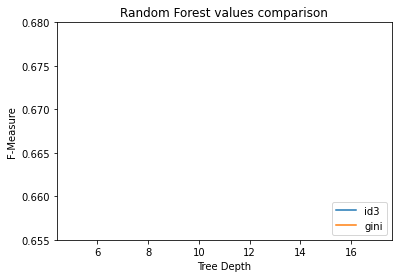

In [24]:
l1, l2 = [], []
for k in rf_fmeasures.keys():
    fmeasures = rf_fmeasures[k]
    plt.scatter([k] * len(fmeasures), fmeasures)
    l1.append(rf_fmeasures[k][0])
    l2.append(rf_fmeasures[k][1])

# create line for each  models
plt.errorbar(max_depth, l1, label ='id3')
plt.errorbar(max_depth, l2, label ='gini')
plt.legend(loc ='lower right')
plt.title('Random Forest values comparison')
plt.xlabel('Tree Depth')
plt.ylabel('F-Measure')
plt.ylim(0.655, 0.68)
plt.show()